# Interpolation of the functions

Imagine that we have a set of points, and that we want to pass a polynomial of least degree through them. We can do this as follows, using a polyfit function that takes points and the degree of a polynomial (which is equal to the number of points minus 1). The polyfit function returns the coefficients of polynomials, while poly1d constructs a function from these coefficients

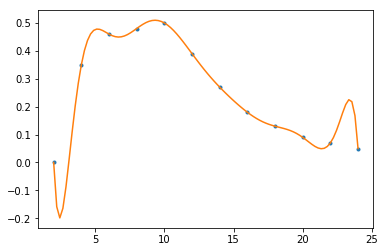

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([2 ,4 , 6, 8, 10 , 12, 14, 16, 18, 20, 22, 24])
f=np.array([0.0 ,0.35 , 0.46, 0.48, 0.50, 0.39,0.27,0.18,0.13,0.09, 0.07, 0.05])
p11 = np.poly1d(np.polyfit(x, f, 11))


xp = np.linspace(2, 24, 100)

plt.plot(x, f, '.', xp, p11(xp), '-')

In the following lectures we will also see the so-called cubic splines, which are special types of smooth functions that pass through given points. In the following code, we passed through the default points with cubic spline.

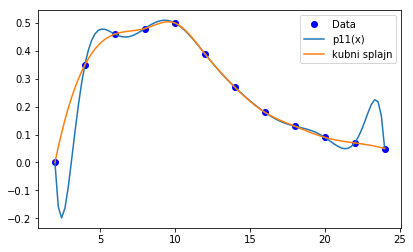

In [11]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(x, f)
fig, ax = plt.subplots(figsize=(6.5, 4))
plt.plot(x, f, 'bo', label="Data")
plt.plot(xp, p11(xp),label="p11(x)")
plt.plot(xp, cs(xp),label="kubni splajn")
ax.legend(loc='upper right')
plt.savefig("interpolacija.eps") 

In the following video you can find out what interpolation is and its basics



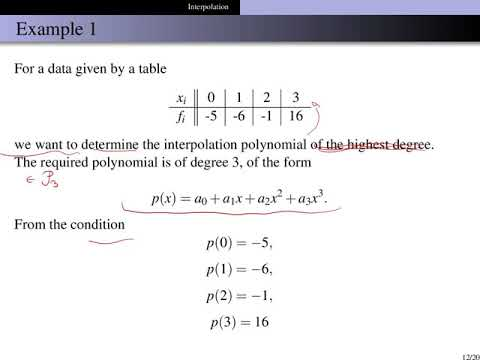

In [16]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("BxxFOZOAqhI")
display(vid)

Example from the video

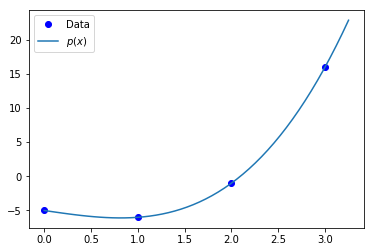

In [17]:
x=np.array([0 ,1 , 2, 3])
y=np.array([-5 ,-6, -1, 16])
a=np.array([1,0 , -2, -5])
z=np.linspace(0.0, 3.25, 50)
pp=np.polyval(a,z)
plt.plot(x, y, 'bo', label="Data")
plt.plot(z, pp,label=r'$p(x)$')
plt.legend(loc='upper left')

Below we see an example of an implementation of the Horner algorithm but this function actually does the same thing as polyval.
After that, we have an example that indicates the high condition number  of the Vandermonde matrix, so we do not get a polynomial that passes through given points.



Condition= 7.6049026858454115e+71


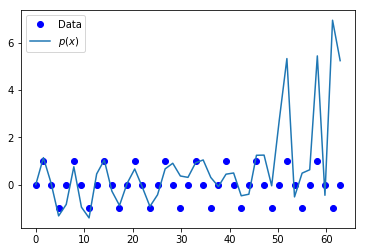

In [18]:
del a
del x
del y
del z
from scipy.linalg import lu_factor, lu_solve

def horner(a, x):
    v = a[0]
    #print(a.shape[0])
    for i in range(1, a.shape[0]):
        v = x * v + a[i]
    return v


n=40
x=np.linspace(0.0,20*np.pi,n+1, endpoint=True)
xu=np.linspace(0.0,20*np.pi,1000, endpoint=True)
y=np.sin(x)
V=np.vander(x,len(x), increasing=True)
print("Condition=", np.linalg.cond(V))
#lu, piv = lu_factor(V)
#a = lu_solve((lu, piv), y)
a=np.linalg.solve(V,y)
c=np.flipud(a)
f=np.polyval(c,x)
k=horner(c,x) # isto kao i polyval, izvrednjavanje polinoma
plt.plot(x,y,'bo', label="Data")
plt.plot(x,f, label=r'$p(x)$')
plt.legend(loc='upper left')
plt.savefig("sinus.png") 



# Lagrange interpolating polynomial

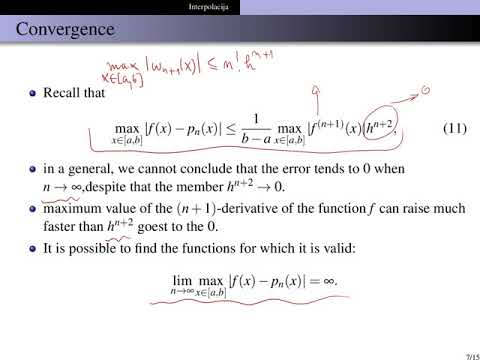

In [19]:
vid = YouTubeVideo("oAL-HdHvy-s")
display(vid)

We now see an example of interpolation with a Lagrange interpolation polynomial



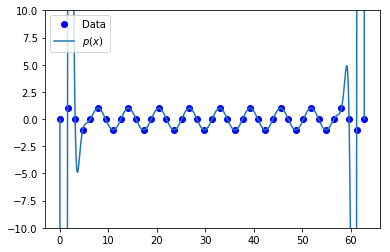

In [8]:
def polyinterp(x,y,u):
    n=len(x)
    v=np.zeros(np.size(u))
    for k in range(n):
        w=np.ones(np.size(u))
        for j in range(k):
            w=(u-x[j])/(x[k]-x[j])*w
        for j in range(k+1,n):
            w=(u-x[j])/(x[k]-x[j])*w
        v=v+w*y[k]
    return v

n=40
x=np.linspace(0.0,20*np.pi,n+1, endpoint=True)
y=np.sin(x)
xu=np.linspace(0.0,20*np.pi,1000, endpoint=True)
v=polyinterp(x,y,xu)
plt.plot(x,y,'bo', label="Data")
plt.plot(xu,v, label=r'$p(x)$')
plt.ylim(-10,10)
plt.legend(loc='upper left')
plt.savefig("sinus.png") 





# Error estimation

In [14]:
vid = YouTubeVideo("iLb9wXAZdsw")
display(vid)